In [1]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random #hinz

targets = []
features = []

files = glob.glob('train/Dosenoeffner/*.jpg')
random.shuffle(files)

for file in files[:500]:    #hinz
    #print(file)
    features.append(np.array(Image.open(file).resize((75, 75))))
    target = [1, 0] if "cat" in file else [0, 1]
    targets.append(target)



features = np.array(features)
targets = np.array(targets)

print("features shape", features.shape)
print("Targets shape", targets.shape)
    

features shape (53, 75, 75, 3)
Targets shape (53, 2)


Fotos anzeigen

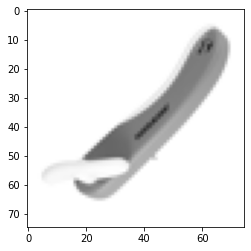

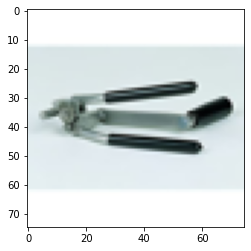

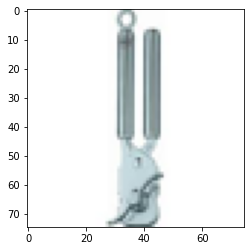

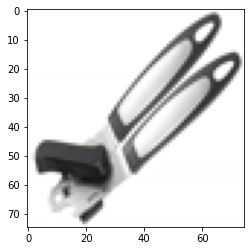

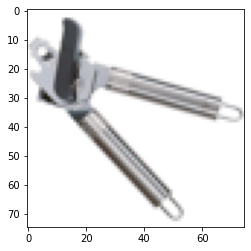

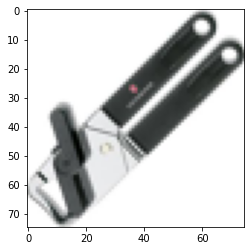

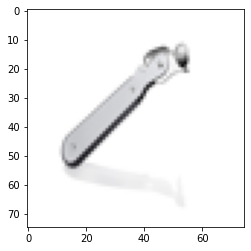

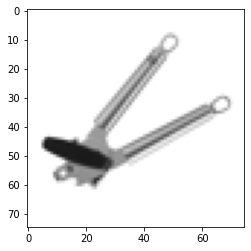

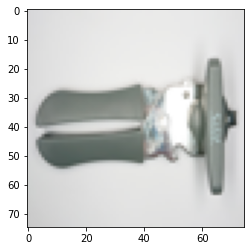

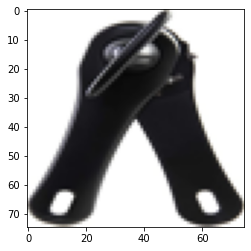

In [2]:
from random import randint

for a in [randint(0, len(features)) for _ in range(10)]:
    plt.imshow(features[a], cmap="gray")
    plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.05, random_state=42)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (50, 75, 75, 3)
X_valid.shape (3, 75, 75, 3)
y_train.shape (50, 2)
y_valid.shape (3, 2)


Création du modèle

In [4]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Placeholder
x = tf.placeholder(tf.float32, (None, 75, 75, 3), name="x")
y = tf.placeholder(tf.float32, (None, 2), name="y")
#dropout = tf.placeholder(tf.float32, (None), name="dropout")
conv_W =tf.Variable(tf.truncated_normal(shape=(filter_size, filter_size, int(prev.get_shape()[-1]), nb)))# 3 filtres de 8 par 8, par channel (LES 3:R,G,B) de l'mage précédente 32  FILTRES
conv_b = tf.Variable(tf.zeros(nb)) # für jeden Filter filtre ein bice(32 filtres)
conv   = tf.nn.conv2d(prev, conv_W, strides=[1, 1, 1, 1], padding='SAME') + conv_b # stride:wie man am Bild sich bewegt(die 1,1 am mittel: 1 pixel in xRichtun, 1 in yRi., padding same: ermöglicht Ausgangbildergröße (en sortie) = Eingangsbil....  
print(conv)

# Activation: relu
#conv = tf.nn.relu(conv)
# Pooling
#conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
#return conv

ModuleNotFoundError: No module named 'tensorflow.contrib'